In [1]:
%matplotlib inline

import numpy as np
import h5py
from extra_data import open_run, H5File
from tqdm import tqdm
from IPython.display import clear_output, display
from matplotlib import pyplot as plt


In [2]:
proposal = 2808
run      = 241

In [3]:
run = open_run(proposal=proposal, run=run, data="raw")
data_module_raw = run['FXE_DET_LPD1M-1/DET/13CH0:xtdf', 'image.data'].ndarray()

In [4]:
run_1 = open_run(proposal=proposal, run=241, data="proc")
data_module_old_cal = run_1['FXE_DET_LPD1M-1/DET/10CH0:xtdf', 'image.data'].ndarray()

In [5]:
def print_name(name, obj):
    if isinstance(obj, h5py.Dataset):
        print('Dataset:', name)
    elif isinstance(obj, h5py.Group):
        print('Group:', name)
with h5py.File("/gpfs/exfel/u/scratch/FXE/202202/p002808/X10ShiftCorr_V3/r0241/RAW-R0241-LPD10-S00000.h5", 'r')  as h5f: # file will be closed when we exit from WITH scope
    h5f.visititems(print_name)

Group: INDEX
Group: INDEX/FXE_DET_LPD1M-1
Group: INDEX/FXE_DET_LPD1M-1/DET
Group: INDEX/FXE_DET_LPD1M-1/DET/10CH0:xtdf
Group: INDEX/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image
Dataset: INDEX/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image/count
Dataset: INDEX/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image/first
Dataset: INDEX/flag
Dataset: INDEX/origin
Dataset: INDEX/timestamp
Dataset: INDEX/trainId
Group: INSTRUMENT
Group: INSTRUMENT/FXE_DET_LPD1M-1
Group: INSTRUMENT/FXE_DET_LPD1M-1/DET
Group: INSTRUMENT/FXE_DET_LPD1M-1/DET/10CH0:xtdf
Group: INSTRUMENT/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image
Dataset: INSTRUMENT/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image/cellId
Dataset: INSTRUMENT/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image/data
Dataset: INSTRUMENT/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image/gain
Dataset: INSTRUMENT/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image/mask
Dataset: INSTRUMENT/FXE_DET_LPD1M-1/DET/10CH0:xtdf/image/pulseId
Group: METADATA
Dataset: METADATA/creationDate
Dataset: METADATA/daqLibrary
Dataset: METADATA/dataFormatVersion
Grou

In [4]:
hf = h5py.File("/gpfs/exfel/u/scratch/FXE/202202/p002808/X10ShiftCorr_V2/r0241/RAW-R0241-LPD13-S00000.h5", 'r')
data_module_v2_cal= np.array(hf["INSTRUMENT/FXE_DET_LPD1M-1/DET/13CH0:xtdf/image/data"][:]) 

In [5]:

hf = h5py.File("/gpfs/exfel/u/scratch/FXE/202202/p002808/X10ShiftCorr_V3/r0241/RAW-R0241-LPD13-S00000.h5", 'r')
data_module_v3_cal= np.array(hf["INSTRUMENT/FXE_DET_LPD1M-1/DET/13CH0:xtdf/image/data"][:]) 

In [6]:
hf = h5py.File("/gpfs/exfel/u/scratch/FXE/202202/p002808/X10ShiftCorr/r0241/RAW-R0241-LPD13-S00000.h5", 'r')
data_module_v1_cal= np.array(hf["INSTRUMENT/FXE_DET_LPD1M-1/DET/13CH0:xtdf/image/data"][:]) 

In [7]:
data_module_raw = np.squeeze(data_module_raw, axis=1)
print(np.shape(data_module_raw))
print(np.shape(data_module_v2_cal))
print(np.shape(data_module_v3_cal))

(60462, 256, 256)
(60462, 256, 256)
(60462, 256, 256)


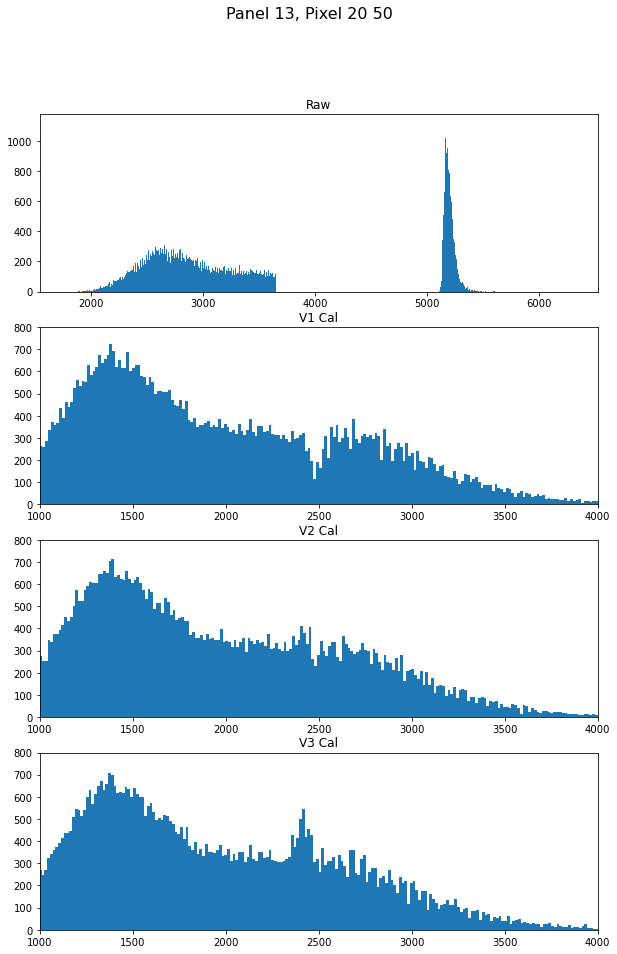

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(4)
i= 20
j = 50
bin_num = 6001
fig.suptitle('Panel 13, Pixel ' +str(i) +' ' +str(j),fontsize='16');
ax[0].hist(data_module_raw[:,i,j], bins=bin_num);
ax[0].set_title('Raw')
ax[1].hist(data_module_v1_cal[:,i,j], bins=bin_num);
ax[1].set_title('V1 Cal')
ax[2].hist(data_module_v2_cal[:,i,j], bins=bin_num);
ax[2].set_title('V2 Cal')
ax[3].hist(data_module_v3_cal[:,i,j], bins=bin_num);
ax[3].set_title('V3 Cal')
plt.setp(ax[3], xlim=[1000,4000], ylim=[0,800]);
plt.setp(ax[2], xlim=[1000,4000], ylim=[0,800]);
plt.setp(ax[1], xlim=[1000,4000], ylim=[0,800]);

In [23]:
all_hits_1 = np.reshape(data_module_v3_cal, (1,np.product(data_module_v3_cal.shape)))[0]

In [24]:
all_hits_1 = np.reshape(data_module_v3_cal, (1,np.product(data_module_v3_cal.shape)))[0]

In [25]:
all_hits = np.reshape(data_module_v2_cal, (1,np.product(data_module_v2_cal.shape)))[0]

In [ ]:
all_hits = np.reshape(data_module_raw, (1,np.product(data_module_raw.shape)))[0]
all_hits_v1 = np.reshape(data_module_v1_cal, (1,np.product(data_module_v1_cal.shape)))[0]
all_hits_v2 = np.reshape(data_module_v2_cal, (1,np.product(data_module_v2_cal.shape)))[0]
all_hits_v3 = np.reshape(data_module_v3_cal, (1,np.product(data_module_v3_cal.shape)))[0]

plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots(4)
bin_num = 5000
fig.suptitle('Panel 14, All Hits',fontsize='16');
ax[0].hist(all_hits[:,], bins=bin_num);
ax[0].set_title('Raw')
ax[1].hist(all_hits_v1[:,], bins=bin_num);
ax[1].set_title('V1 Cal')
ax[2].hist(all_hits_v2[:,], bins=bin_num);
ax[2].set_title('V2 Cal')
ax[3].hist(all_hits_v3[:,], bins=bin_num);
ax[3].set_title('V3 Cal')
plt.setp(ax[3], xlim=[1000,3500], ylim=[0, 0.35e7]);
plt.setp(ax[2], xlim=[1000,3500], ylim=[0, 0.35e7]);
plt.setp(ax[1], xlim=[1000,3500], ylim=[0, 0.35e7]);
plt.setp(ax[0], xlim=[1000,3500]);



In [26]:
all_hits = np.reshape(data_module_raw, (1,np.product(data_module_raw.shape)))[0]
all_hits_v1 = np.reshape(data_module_v1_cal, (1,np.product(data_module_v1_cal.shape)))[0]
all_hits_v2 = np.reshape(data_module_v2_cal, (1,np.product(data_module_v2_cal.shape)))[0]
all_hits_v3 = np.reshape(data_module_v3_cal, (1,np.product(data_module_v3_cal.shape)))[0]


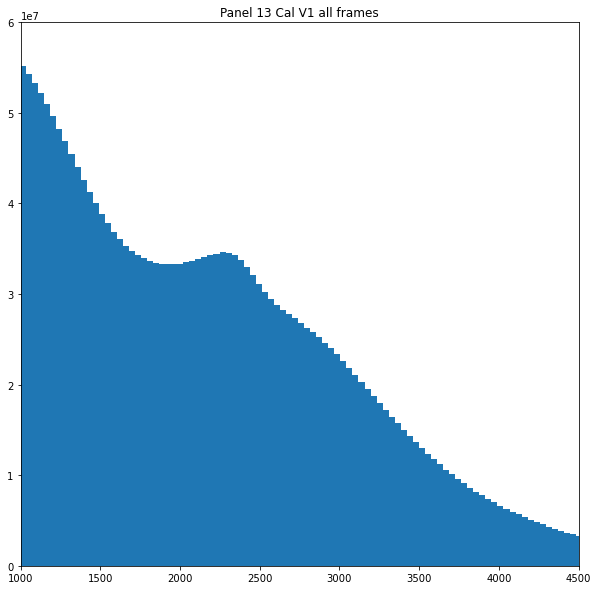

In [28]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Panel 13 Cal V1 all frames')
plt.hist(all_hits_v1[:,], bins=5000)
plt.xlim([1000, 4500])
plt.ylim([0, 0.6e8])
plt.show()

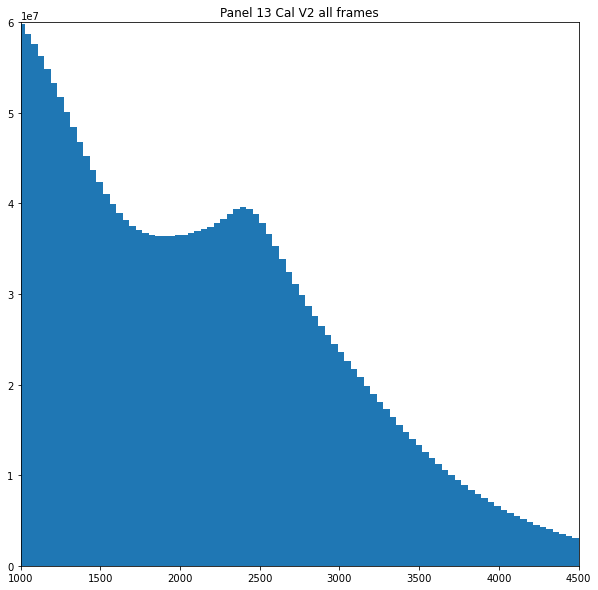

In [29]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Panel 13 Cal V2 all frames')
plt.hist(all_hits_v2[:,], bins=5000)
plt.xlim([1000, 4500])
plt.ylim([0, 0.6e8])
plt.show()

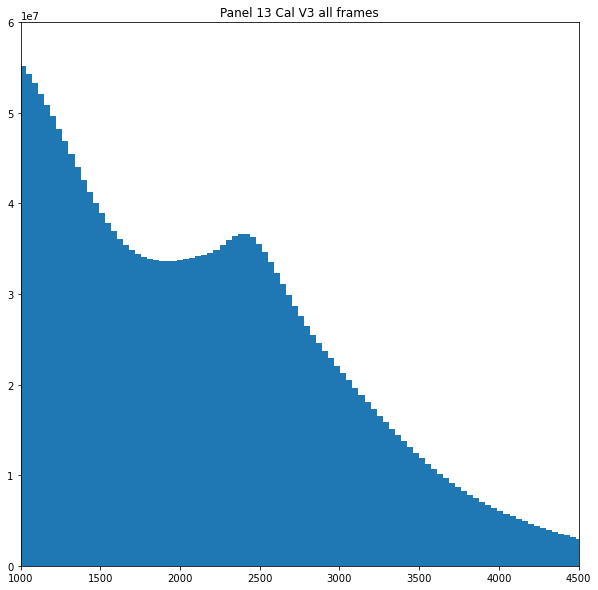

In [30]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Panel 13 Cal V3 all frames')
plt.hist(all_hits_v3[:,], bins=5000)
plt.xlim([1000, 4500])
plt.ylim([0, 0.6e8])
plt.show()